In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display_dft_components(image, title_prefix=""):
    dft = np.fft.fft2(image)
   
    dft_shifted = np.fft.fftshift(dft)


    magnitude_spectrum = np.log(1 + np.abs(dft_shifted))
   
    phase_spectrum = np.angle(dft_shifted)

    real_part = np.real(dft_shifted)

    imaginary_part = np.imag(dft_shifted)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{title_prefix} - Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'{title_prefix} - Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(phase_spectrum, cmap='gray') 
    plt.title(f'{title_prefix} - Phase Spectrum')
    plt.axis('off')

    plt.subplot(2, 3, 4) 
    plt.axis('off')


    plt.subplot(2, 3, 5)
    plt.imshow(real_part, cmap='gray')
    plt.title(f'{title_prefix} - Real Part (Shifted DFT)')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(imaginary_part, cmap='gray')
    plt.title(f'{title_prefix} - Imaginary Part (Shifted DFT)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


N = 64 

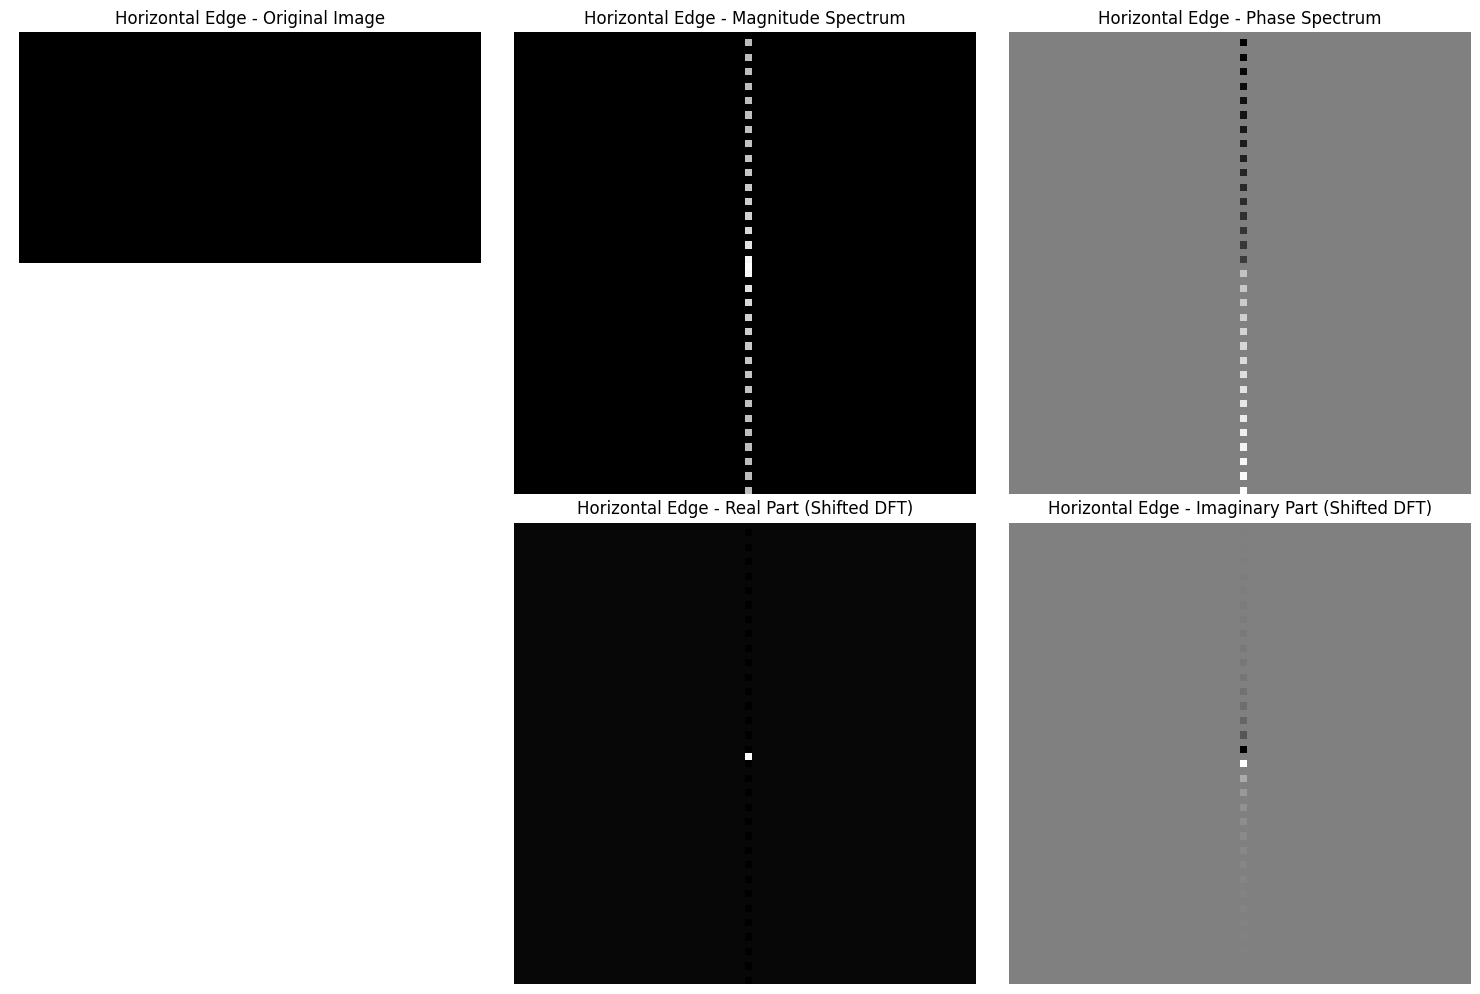

In [4]:
horizontal_edge = np.zeros((N, N))
horizontal_edge[N//2:, :] = 255  

display_dft_components(horizontal_edge, "Horizontal Edge")

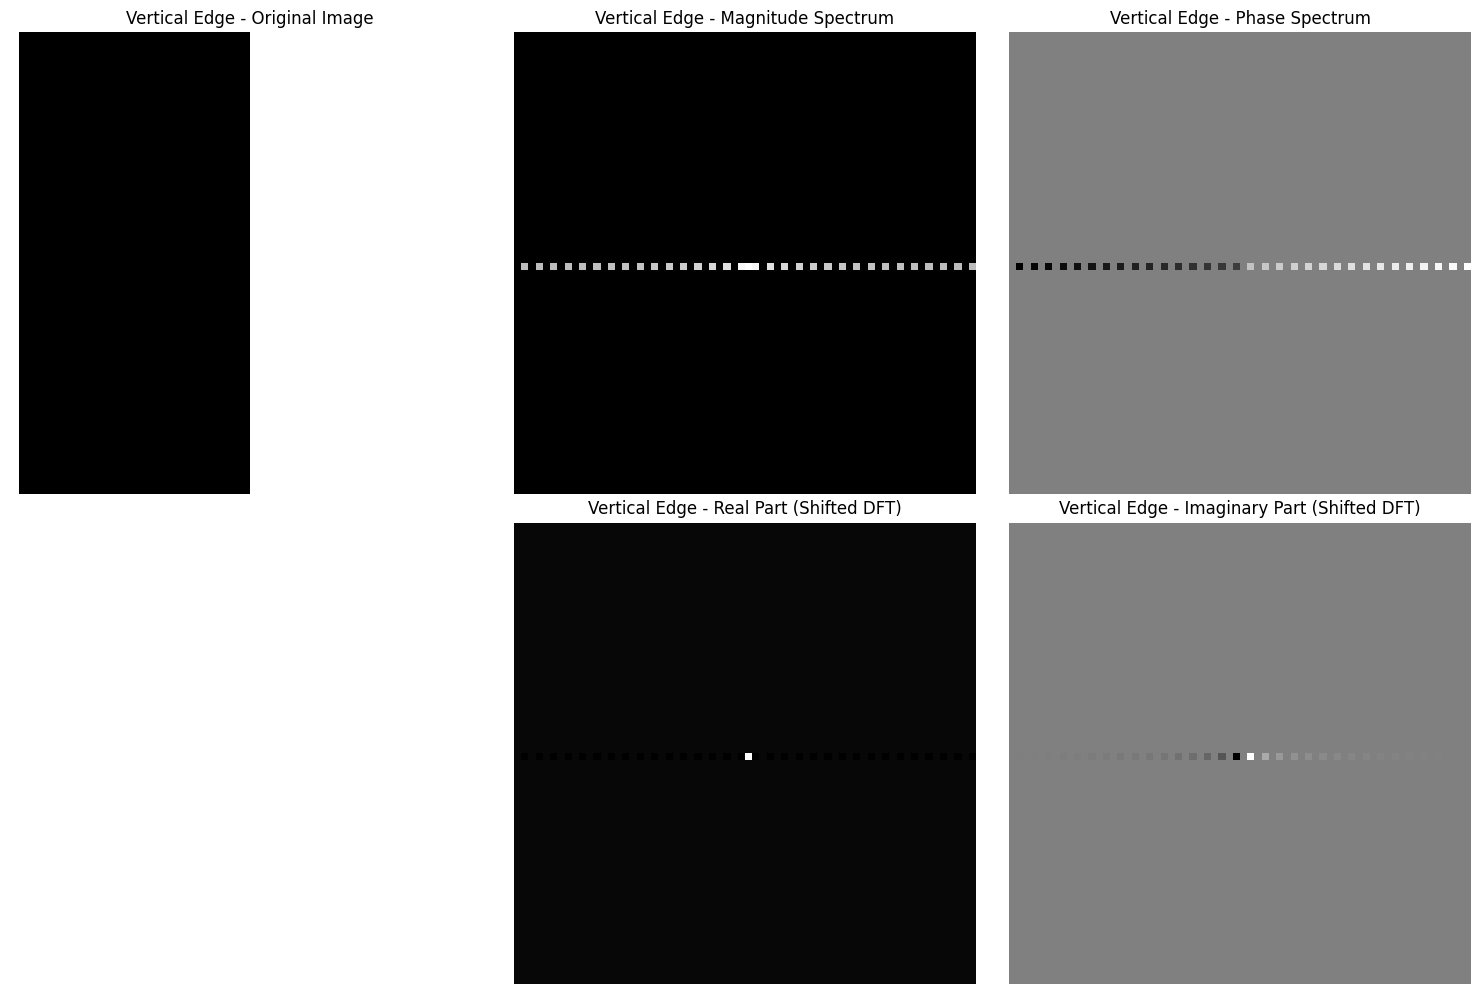

In [5]:

vertical_edge = np.zeros((N, N))
vertical_edge[:, N//2:] = 255  

display_dft_components(vertical_edge, "Vertical Edge")

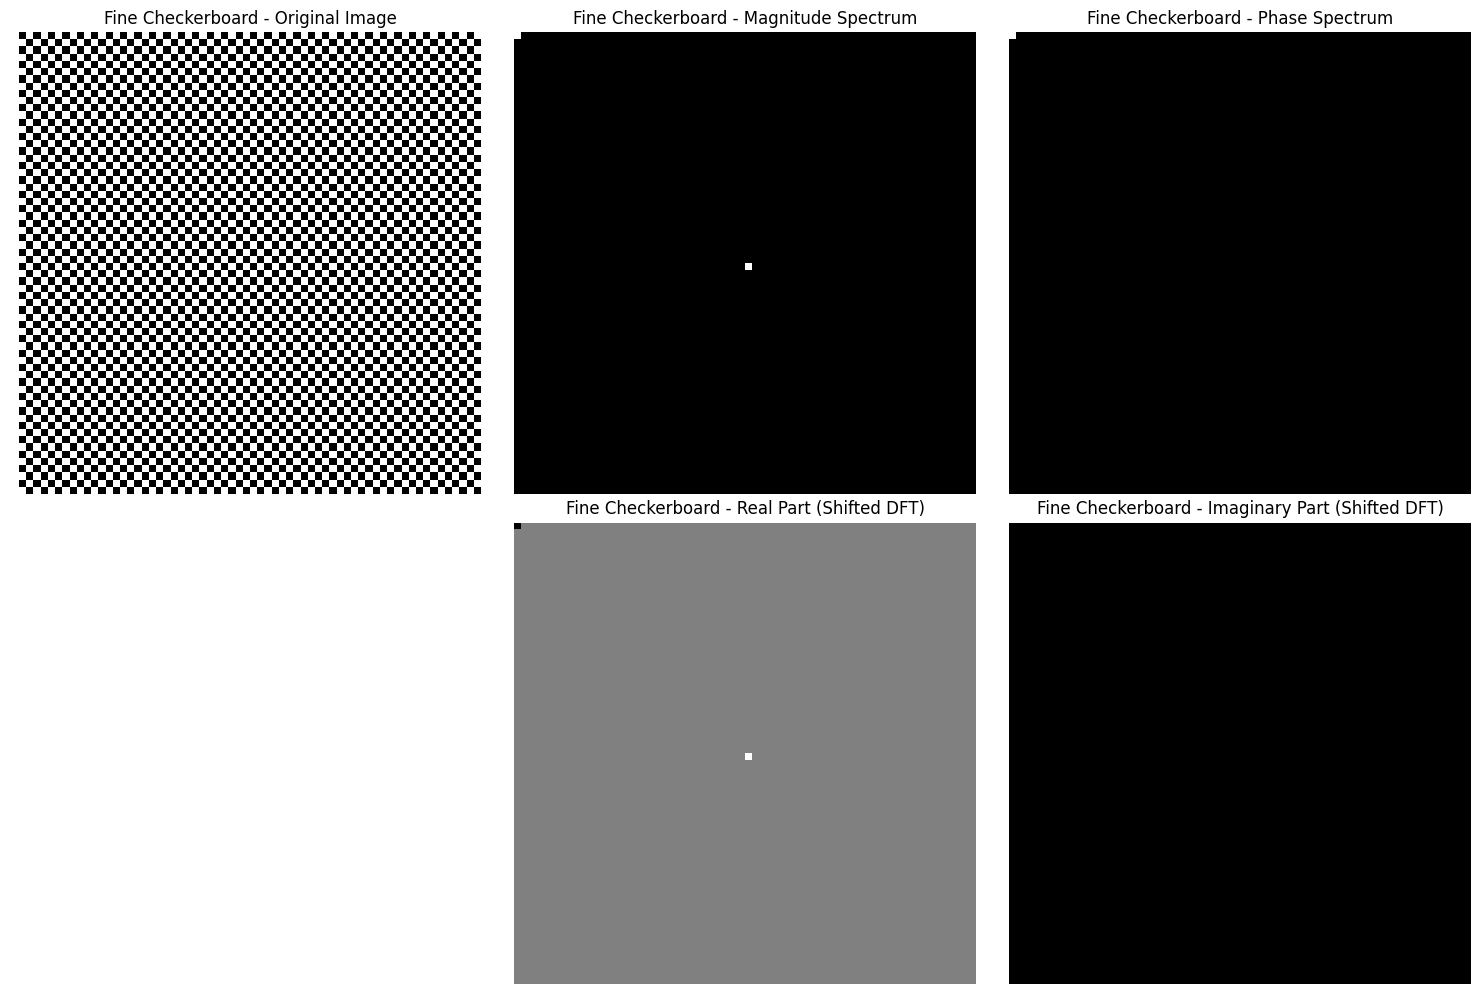

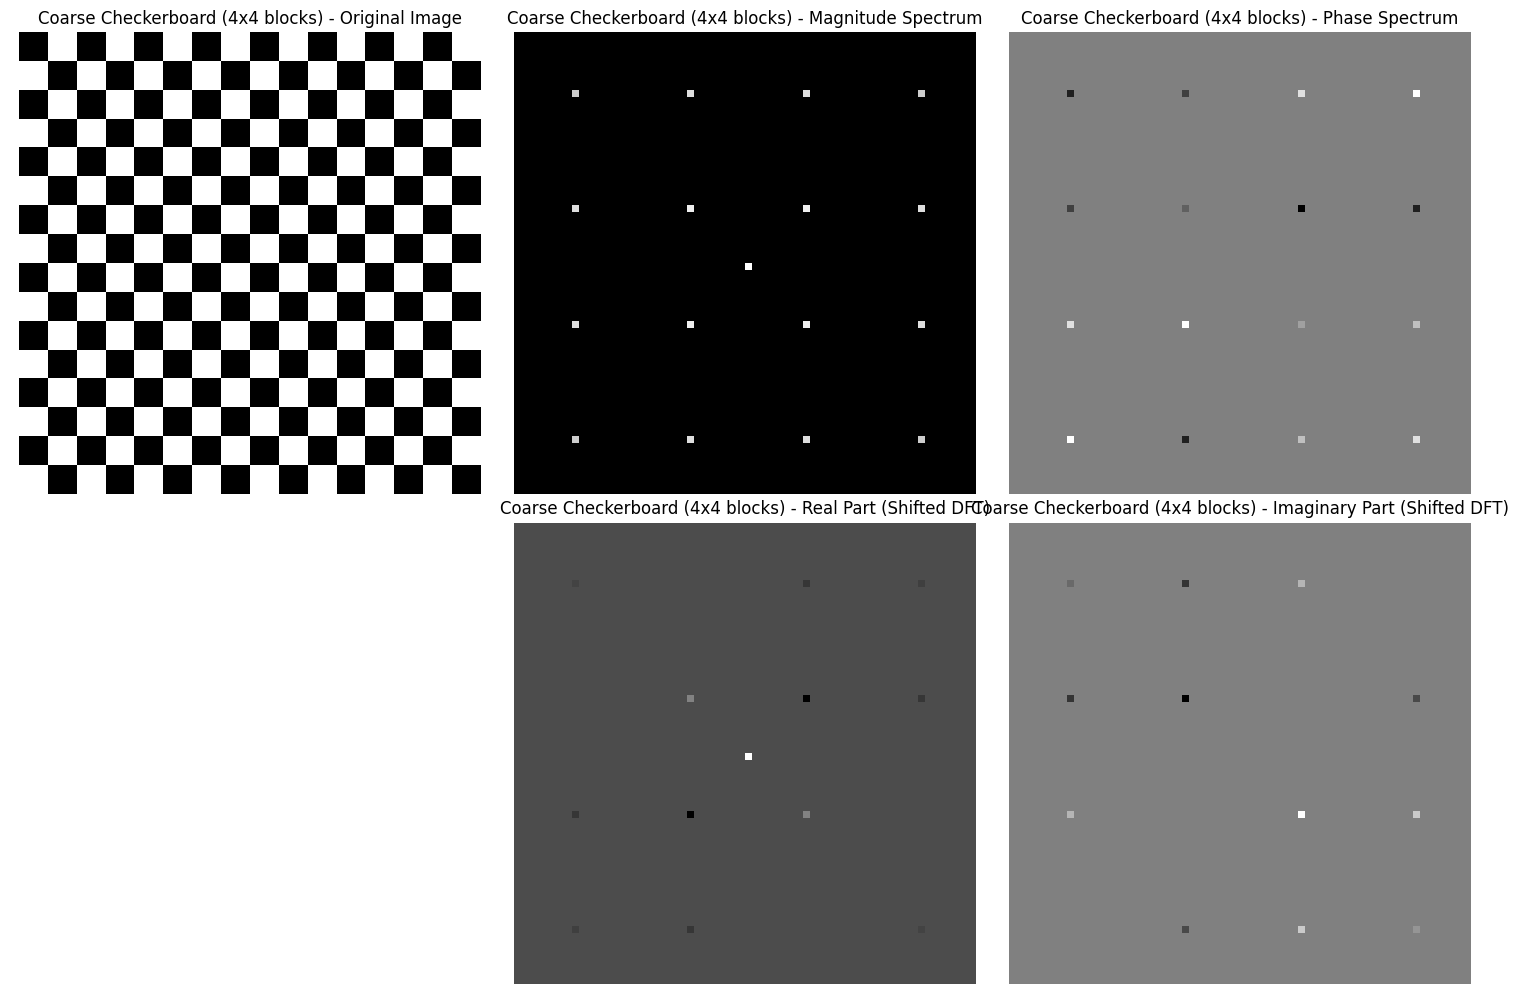

In [6]:

checkerboard = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if (i + j) % 2 == 0:
            checkerboard[i, j] = 0
        else:
            checkerboard[i, j] = 255


fine_checkerboard = np.zeros((N,N))
x, y = np.meshgrid(np.arange(N), np.arange(N))
fine_checkerboard = ((x % 2) ^ (y % 2)) * 255 

block_size = 4
coarse_checkerboard = np.zeros((N, N))
x_block, y_block = np.meshgrid(np.arange(N // block_size), np.arange(N // block_size))
pattern_block = ((x_block % 2) ^ (y_block % 2))
coarse_checkerboard = np.kron(pattern_block, np.ones((block_size, block_size))) * 255



display_dft_components(fine_checkerboard, "Fine Checkerboard")


display_dft_components(coarse_checkerboard, "Coarse Checkerboard (4x4 blocks)")